In [1]:
# Install pandas if not already installed
!pip install pandas
!pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


# Understand the HVAC efficiency penalty due to non-ambient air
Markdown cell. TODO: anything else to write here?

In [2]:
import pandas as pd

def load_data_frame(file_paths):
    """
    Load and merge CSV files into a single DataFrame.

    Parameters:
    - file_paths: List of strings, paths to the CSV files to be merged.

    Returns:
    - merged_df: pandas DataFrame, merged DataFrame with complete rows only.
    """
    
    # Initialize an empty dictionary to store DataFrames
    dataframes = {}

    # Loop over file paths and read each CSV into a DataFrame
    for file_path in file_paths:
        # Extract the base name of the file without the extension to use as a column name
        file_name = file_path.split('/')[-1].split('.')[0]
        
        # Read the CSV file, assuming the first row is the header
        df = pd.read_csv(file_path)
        
        # Dynamically identify the column names for timestamp and temperature
        timestamp_col = df.columns[0]  # First column is the timestamp
        temperature_col = df.columns[1]  # Second column is the temperature
        
        # Keep only the timestamp and temperature columns
        df = df[[timestamp_col, temperature_col]]
        
        # Rename columns internally
        df.rename(columns={timestamp_col: 'timestamp', temperature_col: f'temp_{file_name}'}, inplace=True)
        
        # Store the DataFrame in the dictionary
        dataframes[file_name] = df

    # Merge the DataFrames on the 'timestamp' column
    # TODO(aroetter): Sort of lame to duplicate the filename root code here, could get it from they keys of dataframes...
    # TODO(aroetter): ChatGPT is hardcoding logic assuming that there are exactly 3 filesnames, should be more general.
    merged_df = pd.merge(dataframes[file_paths[0].split('/')[-1].split('.')[0]], 
                         dataframes[file_paths[1].split('/')[-1].split('.')[0]], 
                         on='timestamp', 
                         how='outer')

    merged_df = pd.merge(merged_df, 
                         dataframes[file_paths[2].split('/')[-1].split('.')[0]], 
                         on='timestamp', 
                         how='outer')

    # Check for missing timestamps in any of the files
    missing_data_report = merged_df[merged_df.isna().any(axis=1)]

    # Report any timestamps that could not be joined across all three files
    if not missing_data_report.empty:
        print("Timestamps with missing data in one or more files:")
        print(missing_data_report)
    else:
        print("All timestamps are matched across the three files.")
    
    # Remove rows with any missing data
    merged_df.dropna(inplace=True)

    return merged_df



In [3]:
# Define the graphing function
import matplotlib.pyplot as plt

def plot_temperature_data(df):
    """
    Plot temperature data from the DataFrame with timestamps on the x-axis.

    Parameters:
    - df: pandas DataFrame, the DataFrame returned from load_data_frame with timestamps and temperature data.

    Returns:
    - None
    """

    # Ensure 'timestamp' is treated as a datetime object
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    # Set the figure size
    plt.figure(figsize=(12, 6))

    # Plot each temperature column
    for column in df.columns:
        if column != 'timestamp':  # Skip the timestamp column
            plt.plot(df['timestamp'], df[column], label=column)

    # Set the labels and title
    plt.xlabel('Timestamp')
    plt.ylabel('Temperature (Fahrenheit)')
    plt.title('Temperature Time Series for Each CSV File')

    # Add a legend to differentiate between the files
    plt.legend()

    # Rotate the x-axis labels for better readability
    plt.xticks(rotation=45)

    # Display the plot
    plt.show()

In [4]:
# Example usage:
file_paths = ['ambient.csv', 'intake.csv', 'patio.csv']
cleaned_df = load_data_frame(file_paths)

# Display the cleaned DataFrame
# print("\nCleaned DataFrame with only complete data (first few rows):")
# print(cleaned_df.head())


All timestamps are matched across the three files.


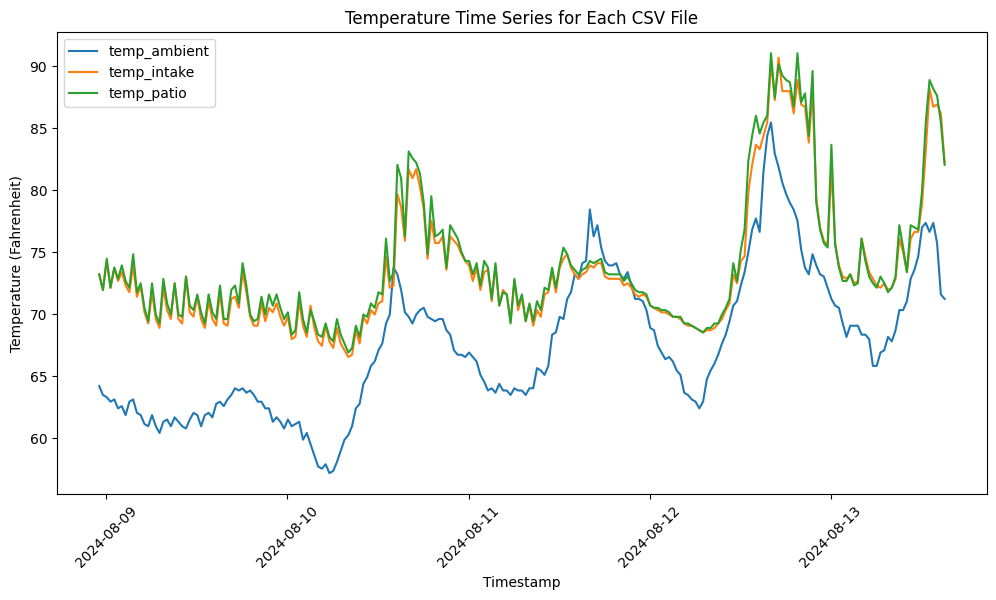

In [5]:
plot_temperature_data(cleaned_df)
